In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///desktop/MSU_Data_bootcamp/Climate_w_sqlalchemy/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()

#this line reflects the database so that we can examine it
Base.prepare(engine, reflect=True)

#This line gets us the names of tables. 
Base.classes.keys()

['measurement', 'station']

In [8]:
# I am going to assign classes 'measurement' and 'station' to variables
# a database table is always associated with a class in python, which dictates what
#column values are expected. These columns are the attributes of a class
measur = Base.classes.measurement

stat = Base.classes.station

In [9]:
#create a session so that I can connect with the database and retreive data

sesh = Session(engine)

In [10]:
#I want to view the attributes for each table now
#this cell is for the measurements table
fr_measur = sesh.query(measur).first()

fr_measur.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cadcf879d0>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
#same thing as above for the stations table
fr_stat = sesh.query(stat).first()

fr_stat.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cadcf90190>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Last date in file found to be 8/23/17 by inspecting .csv

#set a reference date 12mos before the last date in the set
ref_date = dt.datetime(2016, 8, 23)

#a list of columns to select
sel = [measur.prcp, measur.station, measur.id, measur.tobs, measur.date]

#write a query with a filter that specifies the date be later than the reference date
yr_precip = sesh.query(*sel).filter( measur.date > ref_date).all()

yr_precip                                       


[(0.08, 'USC00519397', 2365, 79.0, '2016-08-24'),
 (0.08, 'USC00519397', 2366, 80.0, '2016-08-25'),
 (0.0, 'USC00519397', 2367, 79.0, '2016-08-26'),
 (0.0, 'USC00519397', 2368, 77.0, '2016-08-27'),
 (0.01, 'USC00519397', 2369, 78.0, '2016-08-28'),
 (0.0, 'USC00519397', 2370, 78.0, '2016-08-29'),
 (0.0, 'USC00519397', 2371, 79.0, '2016-08-30'),
 (0.13, 'USC00519397', 2372, 80.0, '2016-08-31'),
 (0.0, 'USC00519397', 2373, 81.0, '2016-09-01'),
 (0.0, 'USC00519397', 2374, 80.0, '2016-09-02'),
 (0.0, 'USC00519397', 2375, 79.0, '2016-09-03'),
 (0.03, 'USC00519397', 2376, 75.0, '2016-09-04'),
 (None, 'USC00519397', 2377, 79.0, '2016-09-05'),
 (None, 'USC00519397', 2378, 76.0, '2016-09-06'),
 (0.05, 'USC00519397', 2379, 76.0, '2016-09-07'),
 (0.0, 'USC00519397', 2380, 80.0, '2016-09-08'),
 (0.03, 'USC00519397', 2381, 79.0, '2016-09-09'),
 (0.0, 'USC00519397', 2382, 78.0, '2016-09-10'),
 (0.05, 'USC00519397', 2383, 76.0, '2016-09-11'),
 (0.0, 'USC00519397', 2384, 78.0, '2016-09-12'),
 (0.02, 'U

In [13]:
#set up lists for the 4 most interesting quantities in the list above
precip = []
date = []
stid = []
temps = []

#this loop is to sort the quantities into the list
#it also contains a conditional to clean the precipitation data of values that say "none"
#its somewhat ambiguous, but I understand that value to mean "no precipitation", and not "null", so I'm replacing it with 0.0


for y in yr_precip:
    date.append(y[4])
    temps.append(y[3])
    stid.append(y[1])
    if type(y[0]) == float: 
        precip.append(y[0])
    else:
        precip.append(0.0)

        
#writing a dataframe for this data
y_prec = {"Date":date, "Precipitation":precip, "Temperature":temps, "Station_id":stid}
y_prec_df = pd.DataFrame(data = y_prec, index= date)

#sort the dataframe
y_prec_df = y_prec_df.sort_values(by=['Date'])

#display the first few values
y_prec_df.head()

,Date,Precipitation,Temperature,Station_id
2016-08-24,2016-08-24,0.08,79.0,USC00519397
2016-08-24,2016-08-24,0.00,78.0,USC00517948
2016-08-24,2016-08-24,2.15,77.0,USC00519281
2016-08-24,2016-08-24,2.28,80.0,USC00514830
2016-08-24,2016-08-24,2.15,76.0,USC00513117


In [14]:
#do the same stuff for the other table. 
#this is a small tale that doesn't need much cleaning so the proceduure is simpler. 
stat_dat = pd.read_sql("Select * FROM station", engine)

stat_dat = stat_dat.rename(columns = {"station":"Station_id"})

stat_dat

,id,Station_id,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [15]:
#I'm joining these dataframes using a left join so that I can group by station or station id later

yr_combi_df = pd.merge(y_prec_df, stat_dat, on='Station_id', how="left")

yr_combi_df.head(15)

,Date,Precipitation,Temperature,Station_id,id,name,latitude,longitude,elevation
0,2016-08-24,0.08,79.0,USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2016-08-24,0.00,78.0,USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
2,2016-08-24,2.15,77.0,USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,2016-08-24,2.28,80.0,USC00514830,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,2016-08-24,2.15,76.0,USC00513117,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
5,2016-08-24,1.45,74.0,USC00516128,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
6,2016-08-24,1.22,79.0,USC00519523,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,2016-08-25,0.08,80.0,USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
8,2016-08-25,0.00,81.0,USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
9,2016-08-25,0.06,80.0,USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [26]:
yr_combi_df.dtypes

Date              object
Precipitation    float64
Temperature      float64
Station_id        object
id                 int64
name              object
latitude         float64
longitude        float64
elevation        float64
dtype: object

In [27]:
yr_combi_df = yr_combi_df.astype({'Date':'datetime64[D]'})

yr_combi_df.dtypes

Date             datetime64[ns]
Precipitation           float64
Temperature             float64
Station_id               object
id                        int64
name                     object
latitude                float64
longitude               float64
elevation               float64
dtype: object

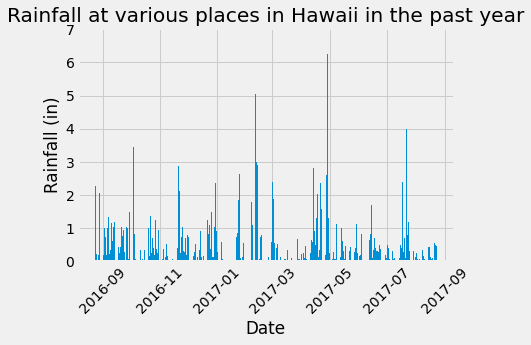

In [32]:
#construct a dataframe specifically for plotting precipitation data

#Note: in order for this to be done gracefully I needed to convert the dtype to datetime64[D] if the type is object the 
#software doesn't prune the lables and you get a black smear instead of readable lables


plt.bar(yr_combi_df['Date'], yr_combi_df['Precipitation'])

plt.xticks(rotation='45')
plt.title('Rainfall at various places in Hawaii in the past year')
plt.xlabel('Date')
plt.ylabel('Rainfall (in)')

plt.show()

In [33]:
#Basic summary stats for precipitation data

pr_stat = yr_combi_df[['Precipitation']].copy()

pr_stat.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [36]:
#making a query to find the number of stations

st_ct = pd.read_sql('SELECT COUNT(station) FROM station', engine)

st_ct

,COUNT(station)
0,9


In [48]:
#write a query to order the stations by activity

#use a query to count instances of a station showing up, group by stations and order by count descending
act_stats = pd.read_sql('SELECT station, COUNT(station) AS measurement_ct FROM measurement GROUP BY station ORDER BY COUNT(station) DESC'
                        , engine)

#I'm renaming so that I can merge in data on what the stations are
act_stats = act_stats.rename(columns={'station':'Station_id'})

#merging the data. the sort gets lost because I put the station table first for aesthetic reasons
act_stats_ex = pd.merge(stat_dat, act_stats, on='Station_id')

#resorting
act_stats_ex = act_stats_ex.sort_values(by='measurement_ct', ascending=False)

#result
act_stats_ex

,id,Station_id,name,latitude,longitude,elevation,measurement_ct
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2772
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2724
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,2709
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2669
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2612
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2202
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,1979
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,1372
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,511


In [49]:
# write a query to obtain the last 12 months of temperature data
# I don't need to do this because I used my initial query to get temperature as well as precipitation data

y_temp_df = y_prec_df[['Date', 'Temperature', 'Station_id']].copy()

y_temp_df.head()


,Date,Temperature,Station_id
2016-08-24,2016-08-24,79.0,USC00519397
2016-08-24,2016-08-24,78.0,USC00517948
2016-08-24,2016-08-24,77.0,USC00519281
2016-08-24,2016-08-24,80.0,USC00514830
2016-08-24,2016-08-24,76.0,USC00513117
